In [269]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import asyncio
import datetime
from concurrent.futures import ThreadPoolExecutor
import time
import nest_asyncio
import random
from nltk import word_tokenize
import re
import numpy as np
from anytree import Node, RenderTree
import itertools
from skimage.transform import hough_circle,hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage import color
import cv2
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.util import img_as_ubyte

In [3]:
print('find the methods in a class')
class ClassWithMethods:
    #def __init__(self):
        
    def method1(self):
        print('method1')
    def method2(self):
        print('method2')
        
obj=ClassWithMethods()

obj.method1()

for method_name in dir(obj):
    try:
        if callable(getattr(object, method_name)):
            print(method_name)
    except:
        method_name=""

import inspect
method_names = [attr for attr in dir(obj) if inspect.ismethod(getattr(obj,attr))]        
print(method_names)

print([inspect.getmembers(obj, predicate=inspect.ismethod)])
        
    

find the methods in a class
method1
__class__
__delattr__
__dir__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
['method1', 'method2']
[[('method1', <bound method ClassWithMethods.method1 of <__main__.ClassWithMethods object at 0x000001FD8BD5C688>>), ('method2', <bound method ClassWithMethods.method2 of <__main__.ClassWithMethods object at 0x000001FD8BD5C688>>)]]


In [79]:
print('create the equivalent of tsql accept in pandas')

txt1="""Date,Fruit,Num,Color 
2013-11-24,Banana,22.1,Yellow
2013-11-24,Orange,8.6,Orange
2013-11-24,Apple,7.6,Green
2013-11-24,Celery,10.2,Green"""

txt2="""Date,Fruit,Num,Color 
2013-11-24,Banana,22.1,Yellow
2013-11-24,Orange,8.6,Orange
2013-11-24,Apple,7.6,Green
2013-11-24,Celery,10.2,Green
2013-11-25,Apple,22.1,Red
2013-11-25,Orange,8.6,Orange"""

from io import StringIO
f = StringIO(txt1)
df1 = pd.read_table(f,sep =',')
df1.set_index('Date',inplace=True)
print(df1)

f = StringIO(txt2)
df2 = pd.read_table(f,sep =',')
df2.set_index('Date',inplace=True)
print(df2)

df3 =pd.merge(df2, df1, left_index=True, right_index=True,  how='outer', indicator=True
             ,suffixes=("", "_left")
             ).query("_merge=='left_only'")
remove_columns=[item for item in df3.columns if '_left' in item]
remove_columns.append('_merge')
df3=df3.drop(columns=remove_columns)
print(df3)


             Fruit   Num  Color 
Date                            
2013-11-24  Banana  22.1  Yellow
2013-11-24  Orange   8.6  Orange
2013-11-24   Apple   7.6   Green
2013-11-24  Celery  10.2   Green
             Fruit   Num  Color 
Date                            
2013-11-24  Banana  22.1  Yellow
2013-11-24  Orange   8.6  Orange
2013-11-24   Apple   7.6   Green
2013-11-24  Celery  10.2   Green
2013-11-25   Apple  22.1     Red
2013-11-25  Orange   8.6  Orange
             Fruit   Num  Color 
Date                            
2013-11-25   Apple  22.1     Red
2013-11-25  Orange   8.6  Orange


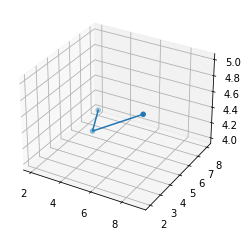

In [89]:
data = [(9, 3, 2), (2, 6, 8), (5, 4, 4)]

ax = plt.subplot(111, projection='3d')
total_point=len(data)
ax.plot(data[0][:total_point],data[1][:total_point],data[2][:total_point])
ax.scatter(data[0][:total_point],data[1][:total_point],data[2][:total_point])
plt.show()

In [54]:
print('run to async functions with awaits for non-blocking processes')

async def func1(**kwargs):
    result=0
    parameters={}
    for key, value in kwargs.items():
        #print(key+":"+str(value))
        parameters[key]=value
    for i in range(parameters['parm1'],parameters['parm2']):
        result+=i
        await asyncio.sleep(0.02)
        print("func1",result)
    return result
async def func2(number, exponent):
    result=pow(number, exponent)
    for i in range(100):
        num1=pow(number+1,exponent)
        result+=num1
        print("func2",result)
        await asyncio.sleep(0.01)
    return result

          
dictParms={'parm1':200,'parm2':300}

async def main():
    await asyncio.gather(
            asyncio.create_task(func1(**dictParms)),
            asyncio.create_task(func2(2,4)),
    )
        
if __name__ == "__main__":
    asyncio.run(main())

func2 97
func2 178
func1 200
func2 259
func1 401
func2 340
func2 421
func1 603
func2 502
func1 806
func2 583
func2 664
func1 1010
func2 745
func1 1215
func2 826
func2 907
func1 1421
func2 988
func1 1628
func2 1069
func2 1150
func1 1836
func2 1231
func1 2045
func2 1312
func2 1393
func1 2255
func2 1474
func1 2466
func2 1555
func1 2678
func2 1636
func2 1717
func1 2891
func2 1798
func1 3105
func2 1879
func2 1960
func1 3320
func2 2041
func1 3536
func2 2122
func2 2203
func1 3753
func2 2284
func2 2365
func1 3971
func2 2446
func1 4190
func2 2527
func2 2608
func1 4410
func2 2689
func1 4631
func2 2770
func2 2851
func1 4853
func2 2932
func1 5076
func2 3013
func2 3094
func1 5300
func2 3175
func1 5525
func2 3256
func2 3337
func1 5751
func2 3418
func1 5978
func2 3499
func2 3580
func1 6206
func2 3661
func1 6435
func2 3742
func1 6665
func2 3823
func2 3904
func1 6896
func2 3985
func1 7128
func2 4066
func2 4147
func1 7361
func2 4228
func1 7595
func2 4309
func2 4390
func1 7830
func2 4471
func1 8066
func2

In [2]:
print('retrieve on alpha numeric words')
sentence ="1 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. huh? The product looks more like a stew than a processed meat and it smells better-looks better. My Labrador is finicky-pampered and she appreciates this product better than most."
sentence=sentence.lower()
words=re.split("[, |-|\?|\!|\.]",sentence)
words=filter(lambda w: ((w.isdigit() or w.isalpha()) and len(w)>0),words)
print(*words)

retrieve on alpha numeric words
1 i have bought several of the vitality canned dog food products and have found them all to be of good quality huh the product looks more like a stew than a processed meat and it smells better my labrador is and she appreciates this product better than most


In [23]:
a = np.matrix([[1, 2, 3, 4, 5], [99, 7, 8, 9, 10], [99, 12, 13, 99, 15], [16, 99, 18, 19, 20], [99, 22, 23, 24, 99]])

out = np.full((n), np.nan)
for i in range(n):
    col=a[:,i]
    #argmax finds the max first occurrence, so reverse the col
    col=col[::-1]
    print(col)
    index = len(col) - np.argmax(col) - 1
    #index=np.argmax(col)
    val=a[index,i]
    #print(val)
    print(index)
    out[i] = index
    
print(out)
m, n = a.shape   
#print(m,n)
for i in range(n):
    # first find max value and then the indexes of that value
    #print(a[:, i],np.amax(a[:, i]))
    z = np.argwhere(a[:, i] == np.amax(a[:, i]))
    w, _ = z.shape
    # extract the position of last max value
    out[i] = z[w - 1, 0]
    
print(out)    

[[99]
 [16]
 [99]
 [99]
 [ 1]]
4
[[22]
 [99]
 [12]
 [ 7]
 [ 2]]
3
[[23]
 [18]
 [13]
 [ 8]
 [ 3]]
4
[[24]
 [19]
 [99]
 [ 9]
 [ 4]]
2
[[99]
 [20]
 [15]
 [10]
 [ 5]]
4
[4. 3. 4. 2. 4.]
[4. 3. 4. 2. 4.]


In [56]:
cols = {'animals':['dog','cat','fish'],
        'colors':['red','black','blue','dog']}

keys=cols.keys()
values=cols.values()
print(values)

data=[]
for key,values in cols.items():
    print(key,values)
    results=itertools.product([key],values)
    for key,item in enumerate(results):
        data.append(item)

print(data)    
df=pd.DataFrame(data,columns=['category','value'])
print(df)

dict_values([['dog', 'cat', 'fish'], ['red', 'black', 'blue', 'dog']])
animals ['dog', 'cat', 'fish']
colors ['red', 'black', 'blue', 'dog']
[('animals', 'dog'), ('animals', 'cat'), ('animals', 'fish'), ('colors', 'red'), ('colors', 'black'), ('colors', 'blue'), ('colors', 'dog')]
  category  value
0  animals    dog
1  animals    cat
2  animals   fish
3   colors    red
4   colors  black
5   colors   blue
6   colors    dog


In [141]:
print('How to read the source contents of a juypter note file')

import glob, os
import codecs
import json

def readJupyterNotesFnc(path):
    pySource=""
    count=0
    path=os.path.expanduser(path)
    for filename in [item for item in os.listdir(path) if item.endswith(".ipynb")  ]:
        if os.access(path + "\\" + filename, os.R_OK):
            with open(path + "\\" + filename,"r", encoding="utf8") as f:
                source = f.read()
                y = json.loads(source)
                #print(y)
                doc=[]
                found=False
                for x in y['cells']:
                    for line in x['source']:
                    #print(line)
                        if "def " in line:
                            doc.append(line)
                            found=True
                if found==True:
                    print("{}\n".format(filename))
                    for item in doc:
                        print("\t{}".format(item))
                count+=1

path= 'C:\\Users\\dnishimoto.BOISE'               
readJupyterNotesFnc(path)                

How to read the source contents of a juypter note file
1. StackOverflow Q&A.ipynb

	def convert(seconds): 

	def get_sec(h,m,s):

	def lookup(columnString):

	def sum_fractions(fractionList):

	def walk_the_tree(inputDict,parent_index=None):

	def lookup(itemParam):

2. StackOverflow Q&A.ipynb

	def GetRandomChoice():

	def nearest(items, pivot):

	def prepdf(df, cat):

	def get_example_df(notbefore=None):

	def merge(list1, list2): 

2020 Stack Overflow survey.ipynb

	def func(pct, allvalues): 

3. Stackoverflow.ipynb

	def data_range(series):

	def column_difference(gr):

	#def zscore(series):

	def get_value(matrix, row_list, col_list):

4. Stackoverflow.ipynb

	def MonthToNum(val):

	def IsNumeric(value):

	def get_pvalue ( con_conv, test_conv, con_size, test_size):

	def get_power(n, p1, p2, cl):

5. Stackoverflow.ipynb

	def walkTheTree(alist):

6. Stack Overflow.ipynb

	def h(X):

	def g(x):

	def annot_max(x,y, ax=None):

	def getValue(number_pool):

7. Stackoverflow.ipynb

	de

Reinforcement Learning Tic Tac Toe.ipynb

	    def __init__(self,symbol):

	    def addState(self, state):

	    def feedReward(self, reward):

	    def reset(self):

	    def chooseAction(self, positions, current_board):

	    def getHash(self,board):

	    def __init__(self):

	    def getCurrentBoardHash(self):

	    def reset(self):

	    def showBoard(self):

	    def updateBoardState(self, position,playerSymbol):

	    def availablePositions(self):

	    def winner(self):

	    def giveReward(self,result):

	def checkForWinner(st,agent1,agent2):

Remaining Payment.ipynb

	def remainAmount(B,r,P,t):

statistics hypothesis illiteracy and fertility.ipynb

	def pearson_r(x,y):

	def bootstrap_replicate_1d(data, func):

	def draw_bs_reps(data, func, size=1):

	def ecdf(data):

statistics hypothesis test click throughs.ipynb

	def permutation_replicate(data_1, data_2, func, size=1):

	def permutation_sample(data1, data2):

	def diff_frac(data_A, data_B):

	def ecdf(data):

	def draw_pe

In [6]:
data=[(-9.83334315,-5.92063135,-7.83228037,5.55314146), (-5.53137301,-8.31010785,-3.28062536,-6.86067081),
(-11.49239039,-1.68053601,-4.14773043,-3.54143976), (-22.25802006,-10.12843806,-2.9688831,-2.70574665), (-20.3418791,-9.4157625,-3.348587,-7.65474665)]

df=pd.DataFrame(data, columns=['A','B','C','D'])
print(df)

           A          B         C         D
0  -9.833343  -5.920631 -7.832280  5.553141
1  -5.531373  -8.310108 -3.280625 -6.860671
2 -11.492390  -1.680536 -4.147730 -3.541440
3 -22.258020 -10.128438 -2.968883 -2.705747
4 -20.341879  -9.415762 -3.348587 -7.654747


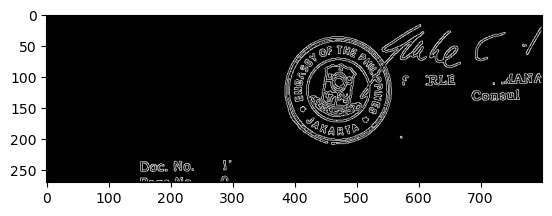

<ipython-input-75-5503cdbc510d>:28: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  t_image = color.gray2rgb(image_slice)


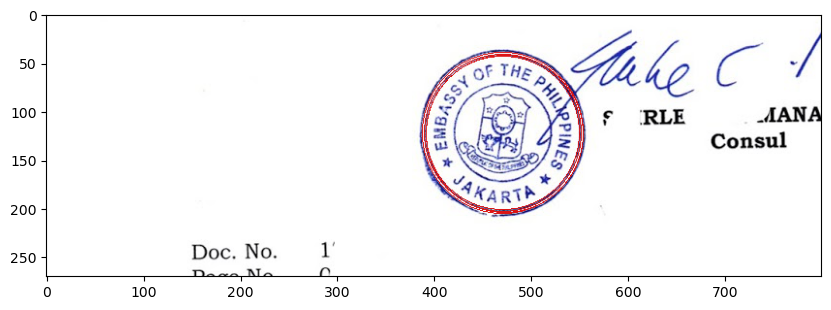

In [75]:
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html
image1=plt.imread('embassy.jpg')
#plt.imshow(image1)
#plt.show()

#slice a section fo the image
image_slice = img_as_ubyte(image1[960:1230, 70:870])

#find the edges
grayscale_image=rgb2gray(image_slice)
canny_edges = canny(grayscale_image, sigma=1.0)

plt.imshow(canny_edges,cmap='gray')
plt.show()


#plt.imshow(canny_edges, cmap='gray')
#plt.show()

hough_radii = np.arange(65, 90, 2)
hough_res = hough_circle(canny_edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=4)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))

t_image = color.gray2rgb(image_slice)

for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=t_image.shape)
    #print(circy,circx)
    t_image[circy, circx] = (220, 20, 20)

ax.imshow(t_image, cmap='gray')
plt.show()

#try_radii = np.arange(5, 50)
#res = hough_circle(grayscale_image, try_radii)

#ridx, r, c = np.unravel_index(np.argmax(res), res.shape)
#gray_image=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

#output=image1.copy()
#circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1.3, 100, param1=80, param2=140, minRadius=30, maxRadius=100)
#if circles is not None:


In [80]:
print("sort on the first field of the tuple list")
my_list = [("ww","hello"),("www","world"),("w","sardines")]

result = sorted(my_list, key = lambda x: x[0])
print(result)

sort on the first field of the tuple list
[('w', 'sardines'), ('ww', 'hello'), ('www', 'world')]


In [119]:
my_list = [[(12, 1), (10, 3), (4, 0), (2, 0)],
           [(110, 1), (34, 2), (12, 1), (55, 3)]]

a = np.array(my_list)
my_list2= np.array([])
my_list3= np.array([])
my_list2=np.append(my_list2,[item[:,0] for item in a])
my_list3=np.append(my_list3,[item[:,1] for item in a])
print(my_list2)
print(my_list3)
my_list2 = [12,10,4,2,110,34,12,55]
my_list3 = [1,3,0,0,1,2,1,3]

[ 12.  10.   4.   2. 110.  34.  12.  55.]
[1. 3. 0. 0. 1. 2. 1. 3.]


In [128]:
str1 = "abc"
str2 = "axbg1c"

print(any([value for value in str1 if value in str2]))

[print(c) for c in str1]
[print(c2) for c2 in str2]

#[[c for c in str1] in [c2 for c2 in str2]]

True
a
b
c
a
x
b
g
1
c


[None, None, None, None, None, None]

In [132]:
print("print the list in a list whose sum is the largest")
a=np.array([[-0.00365169, -10.96455717,  1.44163783,  0.52460176,  2.21493637], 
            [-1.05303533, -0.7106505,   0.47988974,  0.73436447, -0.87708389],
            [-0.76841759,  0.8405524,   0.91184575, -0.70652033,  0.37646991]])

print(a.sum(axis=1))
print(a[np.argmax(a.sum(axis=1))])


print the list in a list whose sum is the largest
[-6.7870329  -1.42651551  0.65393014]
[-0.76841759  0.8405524   0.91184575 -0.70652033  0.37646991]


In [136]:
print("sum each column in a list of a list")
l = [[3, 2, 3, 2], [3, 2, 2, 3],[3, 2, 2, 2], [3, 2, 2, 10], [3, 3, 3, 3]] 

print([sum(col) for col in zip(*l)])

sum each column in a list of a list
[15, 11, 12, 20]


In [138]:
from collections import Counter

listAnyKind = ['diamonds', 'spades', 'spades', 'clubs','hearts', 'diamonds'] 
print(Counter(listAnyKind))

Counter({'diamonds': 2, 'spades': 2, 'clubs': 1, 'hearts': 1})


In [179]:
import glob, os
import codecs
import json

pattern="(\s{1}actions\s{1})"
path= 'C:\\Users\\dnishimoto.BOISE\\python'  
for filename in [item for item in os.listdir(path) if item.endswith(".txt")  ]:
    if os.access(path + "\\" + filename, os.R_OK):
        with open(path + "\\" + filename,"r") as f:
            lines = f.readlines()
            for line in lines:
                if re.search(pattern,line):
                    print(filename)
                    print("\t{}".format(line))

creating a search engine.txt
	12      Fearing the actions of a god-like Super Hero l...

data engineering.txt
	5. actions .count() or .first()

data science for business.txt
	1. actions

kpi.txt
	#customer actions

kpi.txt
	2. not required to track users actions across time

kpi.txt
	3. can treat simpler actions as responses to the test

machine learning for business.txt
	identify causal relationship of how much certain actions affect an outcome of interest

machine learning for business.txt
	c. what are the business actions to take. Prioritize and invest more in markets with higher predicted demand

machine learning for business.txt
	c. What business actions will we take (what are the targets)

machine learning for business.txt
	Run certain actions eg marketing campaign, for group A and no actions for group B

pyspark and big data.txt
	spark operations = transformations + actions

pyspark and big data.txt
	2. actions perform computation on the rdds

pyspark and big data.txt
	RDD actio

In [270]:
string="OK      DiskDrive       SDX  SAMSUNG MZNLN256HMHQ-000H1       SCSI\DIS"
pattern="([\S]+\s{0,2}[\S\w]*)"
matches=re.findall(pattern,string)
for match in matches:
    print(match)

OK  
DiskDrive  
SDX  SAMSUNG
MZNLN256HMHQ-000H1  
SCSI\DIS


In [285]:
address =  "4502 150th Pl SE, Bellevue, WA 98006"
pattern= "([\w\s]*\,*(?:[\S]+))"

matches=re.findall(pattern,address)
for match in matches:
    print(match)

4502 150th Pl SE,
 Bellevue,
 WA 98006


In [283]:
string="WA 98006"

pattern="[\S]+"
matches=re.findall(pattern,string)
for match in matches:
    print(match)

WA
98006
